#Sleeper API Tutorial - Python 


[<img align="left" alt="Sleeper" width="50px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fsleepercdn.com%2Fimages%2Flogos%2Fog_logo-66ee2f04c1dc70ba8cb5ec9f780990d1.png%3Fvsn%3Dd&f=1&nofb=1" />][Sleeper] [<img align="left" alt="Python" width="50px" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcode.fb.com%2Fwp-content%2Fuploads%2F2016%2F05%2F2000px-Python-logo-notext.svg_.png&f=1&nofb=1" />][Python]

[Sleeper]: https://sleeper.app/
[Python]: https://www.python.org/


## Introduction/First Steps

Do you have a fantasy football league on [Sleeper](https://sleeper.app/) and want to learn python? Great! Because this tutorial is dedicated towards leveraging the Sleeper API for data retrieval purposes that open the door to many analyses you can run using your league's data. Huge props to [SwapnikKatkoori](https://github.com/SwapnikKatkoori) and others who created this package; it's awesome!

*If you aren't familiar with the term API, check out [this video](https://www.youtube.com/watch?v=s7wmiS2mSXY). It gives a succicnt yet informative overview of what an Application Programming Interface is and how they work.*

I use Google Colab to code and I absoloutely love it. It's convenient, has a digestible UI, is incredibly useful for group work via sharing and much more. All you need is a Google account and you're good to go (*also, did I mention it has dark mode?*). 

Downloading Colab on your Google account is as simple as a few clicks. From Google Drive, click New > More > Connect More Apps. Type in 'Google Colab', click download, and you're ready to code!

Google has python and many of its core data science packages natively installed in the cloud, meaning you don't even need to download python on your machine! However, some packages made by the community, such as this one, aren't native to Colab. Thus, we must run a quick `pip install`.

In [ ]:
pip install sleeper-api-wrapper

Great! Doing this gives us access to everything the package has to offer. There are three classes full of functions that will help us with our analyses. They are `League()`, `User()`, and `Players()`. We will import those dependencies (along with other necessary python modules) so we can use them in our notebook.

*For more information, check out the package's [documentation](https://pypi.org/project/sleeper-api-wrapper/#install). You may notice that there is actually a fourth class `Stats()`. Unfortunately, Sleeper's data provider requested they remove that API endpoint and therefore it no longer works. For statistical data similar to this, I strongly suggest checking out [Ben Baldwin](https://twitter.com/benbbaldwin) and [Sebastian's](https://twitter.com/mrcaseb) [nflfastR package](https://mrcaseb.github.io/nflfastR/) that provides play-by-play data dating back to 1999!* 

[<img align="left" alt="nflfastr" width="50px" src="https://mrcaseb.github.io/nflfastR/reference/figures/logo.png" />][nflfastr]

[nflfastr]: https://mrcaseb.github.io/nflfastR/

In [ ]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

#Package specific dependencies
from sleeper_wrapper import League
from sleeper_wrapper import User
from sleeper_wrapper import Players

`pandas` is a core python data science module that is used for data manipulation. It's an absolute must for data analysis with python. <br /> `matplotlib.pyplot`, or more commonly referred to as matplotlib, and `seaborn` are python's main data visualization libraries. Both can be utilized to create beautiful and informative plots! <br /> 
*We use shorter aliases when importing these pacakges for qulity of life purposes. For example, having to type out `matplotlib.pyplot.plot()` every time you'd like to plot something is rather inconvenient as opposed to using the alias we assigned to it by typing `plt.plot()`* <br /> `json_normalize` is useful for us here because the package returns data in [JSON](https://www.json.org/json-en.html) format. We want our data to be in a nice looking data frame, and this helps with that.

##Let's Start Coding! 🐍

First we must let Sleeper know which league's data we want. To do this, we can assign a league id to a variable, in this case `league_id`, and then use that same variable to initialize the `League()` class by passing it to the `league` variable. Now, every time we want to use a function within the `League()` class, we can use the `league` variable as it is now assigned to our league.

*Note: the only way to get your league's id is in the URL on Sleeper's desktop version. The id is not obtainable through the mobile app.*

In [ ]:
league_id = 598375240535429120

league = League(league_id)

Next we will use some very useful functions within the `League()` class. They are `League.get_rosters()` and `League.get_users()`. This will retrieve every roster and user in your league. We will assign them to the following variables.

In [ ]:
rosters = league.get_rosters()
users = league.get_users()

Let's call the variables and see what data was retrieved for us!

In [ ]:
#I'm not going to run these myself to keep this document from cluttering
#However, you should run them to get an idea of what they look like

#print(rosters)
#print(users)

Gross! This data is in JSON format. This format is good for transferring data (ie from the Sleeper API to our notebook), but it's not very easy to do analysis with and can be represented in a more digestible format. Remember the dependency we installed by the name of `json_normalize`? This will help us transform this JSON data to a nice, clean pandas dataframe. Let's do that with the following code.

In [ ]:
rosters = pd.DataFrame.from_dict(json_normalize(rosters), orient='columns')
users = pd.DataFrame.from_dict(json_normalize(users), orient='columns') #We will come back to this in a few cells

Simply put, we are calling the [.from_dict()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html) function that allows us to create a dataframe from a dicitonary, which is essentially what JSON is. The `json_normalize` helps us because the specific data we have is nested JSON. If you aren't too sure what that means, don't worry. This isn't something you'll be doing too often with data analysis. Let's see what this got us.

In [ ]:
rosters.sample(5)

,taxi,starters,roster_id,reserve,players,player_map,owner_id,metadata,league_id,co_owners,settings.wins,settings.waiver_position,settings.waiver_budget_used,settings.total_moves,settings.ties,settings.losses,settings.fpts,settings.division,metadata.allow_pn_scoring
4,None,"[4017, 5850, 6820, 2315, 4039, 2238, 4950, 320...",5,None,"[1476, 2168, 2238, 2315, 3163, 3200, 3257, 331...",None,418630971085045760,NaN,598375240535429120,None,0,9,0,0,0,0,0,1,NaN
6,None,"[4046, 4663, 6130, 5052, 1992, 4983, 538, 4068...",7,[4036],"[1234, 1386, 1992, 284, 3214, 4036, 4046, 4055...",None,595803509488685056,NaN,598375240535429120,None,0,7,5,0,0,0,0,2,NaN
5,None,"[4881, 4035, 2320, 956, 4037, 2449, 4951, 1067...",6,None,"[1067, 1144, 1149, 147, 1555, 1837, 2320, 2449...",None,None,NaN,598375240535429120,None,0,8,0,0,0,0,0,2,NaN
0,None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,None,"[1049, 1426, 1587, 2331, 2378, 2410, 2505, 282...",None,598374972569747456,NaN,598375240535429120,None,0,1,0,0,0,0,0,3,NaN
2,None,"[24, 4029, 1408, 3969, 947, 4131, 0, 2319, 327...",3,None,"[1408, 1502, 1535, 184, 2028, 2118, 23, 2319, ...",None,598403609108996096,NaN,598375240535429120,None,0,11,0,0,0,0,0,1,NaN


Hmm... there seems to be lists in individual cells. What happened? Remember, the JSON we obtained from the API was nested, and while `json.normalize` did do a great job at formatting this data, there is still one more step we have to go through to make it look great. Looking at the data, it makes sense; the lists are comprised of the player id of each team's starters and players. To fix this, we can use one of my favorite pandas functions ever. [.explode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) will essentially 'explode' these lists, hence its name, into new rows. Let's run the this fucntion for ourselves so we can see what happens.

In [ ]:
rosters = rosters.explode('players').reset_index(drop=True)

In [ ]:
rosters.sample(5)

,taxi,starters,roster_id,reserve,players,player_map,owner_id,metadata,league_id,co_owners,settings.wins,settings.waiver_position,settings.waiver_budget_used,settings.total_moves,settings.ties,settings.losses,settings.fpts,settings.division,metadata.allow_pn_scoring
22,None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,None,6770,None,598374972569747456,NaN,598375240535429120,None,0,1,0,0,0,0,0,3,NaN
276,None,"[138, 4018, 5916, 4455, 2133, 2309, 5859, 6789...",10,None,6768,None,471388014669459456,NaN,598375240535429120,None,0,4,0,0,0,0,0,3,NaN
142,None,"[4017, 5850, 6820, 2315, 4039, 2238, 4950, 320...",5,None,928,None,418630971085045760,NaN,598375240535429120,None,0,9,0,0,0,0,0,1,NaN
218,None,"[421, 4137, 5892, 2382, 1689, 4981, 2374, 1825...",8,None,642,None,562776048849035264,NaN,598375240535429120,None,0,6,0,0,0,0,0,2,NaN
54,None,"[3161, 4988, 4273, 4152, 2216, 5038, 6149, 593...",2,"[4985, 5918]",6845,None,552203147549904896,NaN,598375240535429120,None,0,12,5,0,0,0,0,4,off


Perfect! This took each player from each list and assigned it to a new row. I'm not going to do this for the `starters` column because that isn't too important for this analysis. What we do what though is each team's roster which we now have. To clean things up, let's create a new dataframe consisting of the columns that are useful to us. We will create a list of the columns we want and assign it to the variable `cols`. We can then subset our original dataframe using `cols` and assign it to a new variable.

In [ ]:
cols = ['players','owner_id','settings.division']
rosters_cleaned = rosters[cols]

In [ ]:
rosters_cleaned.sample(5)

,players,owner_id,settings.division
330,4464,598575604840853504,4
267,4038,471388014669459456,3
5,2410,598374972569747456,3
187,5052,595803509488685056,2
118,3163,418630971085045760,1


Now we have every rostered player in the league, the fantasy team they are on, and what division that team is in. These long id numbers don't tell us anything though, so let's fix that. Remember the `users` variable we assigned a couple cells back? We can use that to merge the two dataframes on the `owner_id` so we can see usernames instead! I'm not going to explain the merge process because [this stack overflow thread](https://stackoverflow.com/questions/53645882/pandas-merging-101) does an incredible job at doing so; I refer to it quite often.

In [ ]:
users.sample(5)

,user_id,settings,league_id,is_owner,is_bot,display_name,avatar,metadata.team_name,metadata.mention_pn,metadata.allow_pn,metadata.user_message_pn,metadata.transaction_waiver,metadata.transaction_trade,metadata.transaction_free_agent,metadata.transaction_commissioner,metadata.trade_block_pn,metadata.team_name_update,metadata.player_nickname_update,metadata.player_like_pn,metadata.mascot_message
5,562378109325447168,None,598375240535429120,None,False,rhaggstrom,68dcadbe2d7472fbf127be83fb20faf9,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,551983499110563840,None,598375240535429120,True,False,SashiBrown,0af3380ea0a9d1a117f4fa384f85ec6f,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,598575604840853504,None,598375240535429120,None,False,emorrell11,61bfca158073b2dda70f755d92aacad9,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,552203147549904896,None,598375240535429120,False,False,captainhair24,0af3380ea0a9d1a117f4fa384f85ec6f,NaN,on,on,on,on,on,on,on,on,off,off,on,off
7,595803509488685056,None,598375240535429120,None,False,Nadams2,35ce531f5dbd36518897027706554e00,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged = pd.merge(rosters_cleaned, users, how='left', left_on=['owner_id'], right_on=['user_id'])

In [ ]:
merged

,players,owner_id,settings.division,user_id,settings,league_id,is_owner,is_bot,display_name,avatar,metadata.team_name,metadata.mention_pn,metadata.allow_pn,metadata.user_message_pn,metadata.transaction_waiver,metadata.transaction_trade,metadata.transaction_free_agent,metadata.transaction_commissioner,metadata.trade_block_pn,metadata.team_name_update,metadata.player_nickname_update,metadata.player_like_pn,metadata.mascot_message
0,1049,598374972569747456,3,598374972569747456,None,598375240535429120,True,False,maxbolger,46fab8e66b1a7590d2604876e06dd4d8,The Kendama Kids,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1426,598374972569747456,3,598374972569747456,None,598375240535429120,True,False,maxbolger,46fab8e66b1a7590d2604876e06dd4d8,The Kendama Kids,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1587,598374972569747456,3,598374972569747456,None,598375240535429120,True,False,maxbolger,46fab8e66b1a7590d2604876e06dd4d8,The Kendama Kids,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2331,598374972569747456,3,598374972569747456,None,598375240535429120,True,False,maxbolger,46fab8e66b1a7590d2604876e06dd4d8,The Kendama Kids,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2378,598374972569747456,3,598374972569747456,None,598375240535429120,True,False,maxbolger,46fab8e66b1a7590d2604876e06dd4d8,The Kendama Kids,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,6826,598575604840853504,4,598575604840853504,None,598375240535429120,None,False,emorrell11,61bfca158073b2dda70f755d92aacad9,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,6866,598575604840853504,4,598575604840853504,None,598375240535429120,None,False,emorrell11,61bfca158073b2dda70f755d92aacad9,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,6895,598575604840853504,4,598575604840853504,None,598375240535429120,None,False,emorrell11,61bfca158073b2dda70f755d92aacad9,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,6919,598575604840853504,4,598575604840853504,None,598375240535429120,None,False,emorrell11,61bfca158073b2dda70f755d92aacad9,NaN,on,on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This looks like a mess, but we are almost there. Everything merged correctly, the data just needs to be cleaned up a bit. We can either assign a list of desired columns and subset the dataframe that way (as I did before), or we can also use the filter method. I will show the filter method this time.

In [ ]:
merged_filter = merged.filter(['players', 'display_name','settings.division'])

In [ ]:
merged_filter

,players,display_name,settings.division
0,1049,maxbolger,3
1,1426,maxbolger,3
2,1587,maxbolger,3
3,2331,maxbolger,3
4,2378,maxbolger,3
...,...,...,...
336,6826,emorrell11,4
337,6866,emorrell11,4
338,6895,emorrell11,4
339,6919,emorrell11,4


That looks better! Now, to get the player names to match their id we need to use the `Players()` class. Let's initialize it and call the `.get_all_players()` function and transform the JSON to a dataframe.

In [ ]:
players = Players()
players_df = players.get_all_players()
players_df = pd.DataFrame.from_dict(players_df, orient="index")

In [ ]:
players_df.sample(5)

,position,search_rank,search_first_name,practice_description,age,birth_city,status,pandascore_id,stats_id,depth_chart_order,weight,practice_participation,fantasy_positions,yahoo_id,gsis_id,injury_start_date,active,espn_id,rotoworld_id,years_exp,injury_notes,birth_country,birth_state,full_name,news_updated,college,fantasy_data_id,height,rotowire_id,sport,sportradar_id,first_name,metadata,player_id,hashtag,high_school,injury_body_part,last_name,team,search_full_name,depth_chart_position,birth_date,search_last_name,injury_status,number
2215,G,9999999.0,kadeem,None,29.0,NaN,Inactive,NaN,NaN,2.0,313,None,[OL],27671.0,00-0031180,None,True,16859.0,NaN,6.0,None,NaN,NaN,Kadeem Edwards,1.536693e+12,Tennessee State,16596.0,"6'4""",9445.0,nfl,3f22bb95-48f6-4ff0-a199-55257d0aaf91,Kadeem,NaN,2215,#KadeemEdwards-NFL-FA-78,NaN,None,Edwards,None,kadeemedwards,LG,1991-01-24,edwards,NA,78.0
5401,WR,972.0,armanti,None,NaN,NaN,Active,NaN,835442.0,NaN,209,None,[WR],31231.0,None,None,True,3125115.0,NaN,1.0,None,NaN,NaN,Armanti Foreman,NaN,Texas,20447.0,"5'11""",13147.0,nfl,5eb700e5-713f-40ff-a43a-189521babdbd,Armanti,NaN,5401,#ArmantiForeman-NFL-MIN-3,NaN,None,Foreman,MIN,armantiforeman,None,None,foreman,None,3.0
4363,SS,9999999.0,demetrious,None,26.0,NaN,Inactive,NaN,696159.0,NaN,191,None,[DB],30578.0,00-0033339,None,True,2979535.0,NaN,3.0,None,NaN,NaN,Demetrious Cox,1.532564e+12,Michigan State,19220.0,"5'11""",12425.0,nfl,13d56de6-ed55-4323-b79d-e0d49d936723,Demetrious,NaN,4363,#DemetriousCox-NFL-FA-37,NaN,None,Cox,None,demetriouscox,None,1994-04-20,cox,NA,37.0
1806,FS,812.0,jaylen,None,28.0,NaN,Active,NaN,542789.0,3.0,194,None,[DB],27629.0,00-0031173,None,True,16919.0,NaN,6.0,None,NaN,NaN,Jaylen Watkins,1.584730e+12,Florida,15981.0,"5'11""",9366.0,nfl,2d28c7f5-21e8-40cb-afb4-a8391a5923e7,Jaylen,NaN,1806,#JaylenWatkins-NFL-HOU-27,NaN,None,Watkins,HOU,jaylenwatkins,FS,1991-11-27,watkins,None,27.0
403,CB,9999999.0,mike,None,33.0,NaN,Inactive,NaN,NaN,NaN,198,None,[DB],8802.0,None,None,False,11259.0,NaN,8.0,None,NaN,NaN,Mike Jenkins,NaN,South Florida,8840.0,"5'10""",5614.0,nfl,ddf524fd-1056-4d69-9c51-14cc57f598b8,Mike,NaN,403,#MikeJenkins-NFL-FA-43,NaN,None,Jenkins,None,mikejenkins,None,1985-03-22,jenkins,None,43.0


Below are some good summary functions that help us understand the data. It is a good habit to use these with any dataframe you work with.

In [ ]:
#Returns the shape of a dataframe
players_df.shape

(7498, 45)

In [ ]:
#Returns the columns of a dataframe
players_df.columns

Index(['position', 'search_rank', 'search_first_name', 'practice_description',
       'age', 'birth_city', 'status', 'pandascore_id', 'stats_id',
       'depth_chart_order', 'weight', 'practice_participation',
       'fantasy_positions', 'yahoo_id', 'gsis_id', 'injury_start_date',
       'active', 'espn_id', 'rotoworld_id', 'years_exp', 'injury_notes',
       'birth_country', 'birth_state', 'full_name', 'news_updated', 'college',
       'fantasy_data_id', 'height', 'rotowire_id', 'sport', 'sportradar_id',
       'first_name', 'metadata', 'player_id', 'hashtag', 'high_school',
       'injury_body_part', 'last_name', 'team', 'search_full_name',
       'depth_chart_position', 'birth_date', 'search_last_name',
       'injury_status', 'number'],
      dtype='object')

In [ ]:
#Obviously we mainly have categorical data here, but .describe() is really
#useful when working with quantitative data, so I wanted to include it
#to make sure everyone is aware that it exists
players_df.describe()

,search_rank,age,birth_city,pandascore_id,stats_id,depth_chart_order,yahoo_id,espn_id,rotoworld_id,years_exp,birth_country,birth_state,news_updated,fantasy_data_id,rotowire_id,metadata,high_school,number
count,7.465000e+03,6867.000000,0.0,0.0,2.979000e+03,3287.000000,6740.000000,6.715000e+03,2032.000000,7423.000000,0.0,0.0,4.388000e+03,7463.000000,6418.000000,0.0,0.0,6753.000000
mean,7.333143e+06,26.821465,NaN,NaN,6.157025e+05,2.500456,29908.129822,2.169169e+06,9210.154035,3.454668,NaN,NaN,1.572479e+12,17495.435616,11182.630103,NaN,NaN,46.888494
std,4.422271e+06,3.611346,NaN,NaN,2.051614e+05,1.620936,38728.906207,1.589892e+06,3205.895721,3.426687,NaN,NaN,2.384038e+10,4223.974465,2692.917991,NaN,NaN,28.928201
min,2.000000e+00,19.000000,NaN,NaN,2.384900e+04,1.000000,3727.000000,1.690000e+02,16.000000,0.000000,NaN,NaN,1.507149e+12,3.000000,395.000000,NaN,NaN,0.000000
25%,1.820000e+03,24.000000,NaN,NaN,4.972545e+05,2.000000,27592.750000,1.641600e+04,6743.750000,1.000000,NaN,NaN,1.563575e+12,16053.500000,9408.250000,NaN,NaN,23.000000
50%,9.999999e+06,26.000000,NaN,NaN,6.064880e+05,2.000000,29898.500000,2.973033e+06,9504.500000,2.000000,NaN,NaN,1.579550e+12,18508.000000,11562.500000,NaN,NaN,46.000000
75%,9.999999e+06,29.000000,NaN,NaN,7.491795e+05,3.000000,31636.250000,3.124855e+06,11551.500000,5.000000,NaN,NaN,1.590853e+12,20466.500000,13339.750000,NaN,NaN,71.000000
max,9.999999e+06,62.000000,NaN,NaN,1.171711e+06,40.000000,900379.000000,4.686629e+06,14927.000000,24.000000,NaN,NaN,1.597675e+12,22472.000000,15170.000000,NaN,NaN,99.000000


In [ ]:
#Returns the sum of na values across all columns, useful for knowing how
#useful each column is
players_df.isna().sum()

position                   228
search_rank                 33
search_first_name           32
practice_description      7497
age                        631
birth_city                7498
status                      33
pandascore_id             7498
stats_id                  4519
depth_chart_order         4211
weight                      33
practice_participation    7497
fantasy_positions          228
yahoo_id                   758
gsis_id                   3603
injury_start_date         7468
active                       1
espn_id                    783
rotoworld_id              5466
years_exp                   75
injury_notes              7467
birth_country             7498
birth_state               7498
full_name                   32
news_updated              3110
college                    298
fantasy_data_id             35
height                      33
rotowire_id               1080
sport                        0
sportradar_id               33
first_name                   0
metadata

Unfortunately, some of these columns are just filled with `Nan` values, but there are definitely some columns that will be very useful to us. Let's clean up the dataframe so we can see those important columns.

In [ ]:
players_df_cleaned = players_df.filter(['player_id','full_name','fantasy_positions','age','height','weight','birth_date','years_exp'])

In [ ]:
players_df_cleaned.sample(5)

,player_id,full_name,fantasy_positions,age,height,weight,birth_date,years_exp
6774,6774,Jack Easterby,None,NaN,,,None,0.0
6155,6155,Jaylen Smith,[WR],23.0,"6'2""",221,1997-08-01,1.0
6836,6836,A.J. Terrell,[DB],21.0,"6'1""",195,1998-09-23,0.0
6905,6905,Matt Peart,[OL],23.0,"6'5""",310,1997-06-11,0.0
7388,7388,Jared Hilbers,[OL],NaN,"6'7""",316,None,0.0


When I said they had pretty much every player in the NFL in their database, I meant it lol. Now, we can merge this dataframe to our `merged_filter` dataframe on `player_id` and we will be good to go!

In [ ]:
final_df = pd.merge(merged_filter, players_df_cleaned, how='left', left_on=['players'], right_on=['player_id'])

In [ ]:
#This just changes the format of the fantasy_positions columns into something
#that is easier for us to work with. Don't worry if you aren't sure how it works
final_df['fantasy_positions'] = final_df['fantasy_positions'].map(','.join)

In [ ]:
final_df.sample(10)

,players,display_name,settings.division,player_id,full_name,fantasy_positions,age,height,weight,birth_date,years_exp
160,5185,NaN,2,5185,Allen Lazard,WR,24.0,"6'5""",227,1995-12-11,2.0
19,6068,maxbolger,3,6068,Devine Ozigbo,RB,23.0,"6'2""",225,1996-10-02,1.0
240,4866,rhaggstrom,3,4866,Saquon Barkley,RB,23.0,"5'11""",233,1997-02-09,2.0
46,5872,captainhair24,4,5872,Deebo Samuel,WR,24.0,"5'11""",214,1996-01-15,1.0
330,4464,emorrell11,4,4464,Nick Mullens,QB,25.0,"6'1""",210,1995-03-21,3.0
80,6088,BSyver22,1,6088,Bisi Johnson,WR,23.0,"6'0""",204,1997-03-17,1.0
297,5046,jbolger23,4,5046,Royce Freeman,RB,24.0,"6'0""",238,1996-02-24,2.0
41,5038,captainhair24,4,5038,Michael Gallup,WR,24.0,"6'1""",198,1996-03-04,2.0
333,5068,emorrell11,4,5068,Kerryon Johnson,RB,23.0,"5'11""",211,1997-06-30,2.0
314,1352,emorrell11,4,1352,Robert Woods,WR,28.0,"6'0""",195,1992-04-10,7.0


We did it! This dataframe consists of every rostered player, their eligible positions, age, height, weight, birthdate and years of experience. It also shows which team each of these players belong to!

Note: my league *just* migrated to Sleeper and we still have one more person yet to join the league. This is why one of the display names is a `NaN`.

Using the following code, we can subset this dataframe in a plethora of ways.

In [ ]:
#Subsetting by display_name
final_df[final_df.display_name=='maxbolger'].sort_values(by='fantasy_positions',ascending=True)

,players,display_name,settings.division,player_id,full_name,fantasy_positions,age,height,weight,birth_date,years_exp
0,1049,maxbolger,3,1049,Ryan Tannehill,QB,32.0,"6'4""",207,1988-07-27,8.0
22,6770,maxbolger,3,6770,Joe Burrow,QB,23.0,"6'3""",221,1996-12-10,0.0
8,289,maxbolger,3,289,Drew Brees,QB,41.0,"6'0""",209,1979-01-15,19.0
11,3294,maxbolger,3,3294,Dak Prescott,QB,27.0,"6'2""",238,1993-07-29,4.0
25,6955,maxbolger,3,6955,James Robinson,RB,22.0,"5'9""",219,1998-08-09,0.0
24,6908,maxbolger,3,6908,Lamical Perine,RB,22.0,"5'11""",216,1998-01-30,0.0
20,6178,maxbolger,3,6178,Darwin Thompson,RB,23.0,"5'8""",200,1997-02-12,1.0
19,6068,maxbolger,3,6068,Devine Ozigbo,RB,23.0,"6'2""",225,1996-10-02,1.0
18,6039,maxbolger,3,6039,Ty Johnson,RB,22.0,"5'10""",210,1997-09-17,1.0
17,6012,maxbolger,3,6012,Travis Homer,RB,22.0,"5'10""",202,1998-08-07,1.0


Here's my team... is it good? I am obviously hurting very bad at runningback, but I think my team is in a great spot right now nonetheless. My wide receivers though 👀

In [ ]:
#Subsetting by division
final_df[final_df['settings.division']==1]

,players,display_name,settings.division,player_id,full_name,fantasy_positions,age,height,weight,birth_date,years_exp
58,1408,BSyver22,1,1408,Le'Veon Bell,RB,28.0,"6'1""",225,1992-02-18,7.0
59,1502,BSyver22,1,1502,Chris Thompson,RB,29.0,"5'8""",195,1990-10-20,7.0
60,1535,BSyver22,1,1535,Cordarrelle Patterson,"WR,RB",29.0,"6'2""",238,1991-03-17,7.0
61,184,BSyver22,1,184,Adrian Peterson,RB,35.0,"6'1""",220,1985-03-21,13.0
62,2028,BSyver22,1,2028,Derek Carr,QB,29.0,"6'3""",210,1991-03-28,6.0
...,...,...,...,...,...,...,...,...,...,...,...
138,6820,rrude3,1,6820,Clyde Edwards-Helaire,RB,21.0,"5'7""",207,1999-04-11,0.0
139,6849,rrude3,1,6849,Denzel Mims,WR,22.0,"6'3""",207,1997-10-10,0.0
140,6886,rrude3,1,6886,Chase Claypool,WR,22.0,"6'4""",238,1998-07-07,0.0
141,7045,rrude3,1,7045,Joshua Kelley,RB,22.0,"5'11""",213,1997-11-20,0.0


Note that in the first subset, I used `[final_df.display_name=='maxbolger']` and in the second I used `[final_df['settings.division']==1` The difference here is how we denote the column of interest. The former uses a dot while the latter is bracketed and in string format. In python, both dot and bracket notation work. Use whichever method you prefer, but keep in mind there are some situations where bracket notation is needed. For example, I had to use bracket notation when subsetting by division because the column name had a dot in it, and if we were to use dot notation, python would get confused, as dots signify an operation. The other scenario where bracket notation is needed is when a column has the same name as a python statement, such as `pass`. Again, use whichever is most convenient for you, but make sure to keep these particular use cases in mind.

Let's do one more subset. This time, lets see who the heaviest players are, just for fun. Maybe many of the heaviest players play the same position? That would be interesting. Let's find out. 

In [ ]:
#Subsetting by weight
final_df[final_df.weight>260]

What happened? `TypeError: '>' not supported between instances of 'str' and 'int'`. Hmm... this means that the `weight` column is a string instead of an integer, and therefore python can't use a mathematical opperator such as `>`. Let's check the data types of the columns in our dataframe (this is a very important practice that should be done with every dataset you work with in python).

In [ ]:
final_df.dtypes

players               object
display_name          object
settings.division      int64
player_id             object
full_name             object
fantasy_positions     object
age                  float64
height                object
weight                object
birth_date            object
years_exp            float64
dtype: object

Yep, we were right. Weight is an `object`, or `string`, which is just an array of characters. An `int64` is a 64-bit integer, while a `float64` is a 64-bit floating point number, which means it has decimal values. Conveniently, we are able to change the datatype of a column! There are [many ways to do this](https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas), but we will go with `.to_numeric()`.

In [ ]:
final_df['weight'] = pd.to_numeric(final_df['weight'])

In [ ]:
final_df.dtypes

players               object
display_name          object
settings.division      int64
player_id             object
full_name             object
fantasy_positions     object
age                  float64
height                object
weight                 int64
birth_date            object
years_exp            float64
dtype: object

We successfully changed the dtype of `weight` from a string to an int. Awesome! Let's try that subset again.

In [ ]:
#Subsetting by weight
final_df[final_df.weight>260]

,players,display_name,settings.division,player_id,full_name,fantasy_positions,age,height,weight,birth_date,years_exp
2,1587,maxbolger,3,1587,Vance McDonald,TE,30.0,"6'4""",267,1990-06-13,7.0
64,23,BSyver22,1,23,Jason Witten,TE,38.0,"6'6""",263,1982-05-06,17.0
94,515,SashiBrown,1,515,Rob Gronkowski,TE,31.0,"6'6""",268,1989-05-14,10.0
211,5010,Stin95,2,5010,Will Dissly,TE,24.0,"6'4""",265,1996-07-08,2.0
254,943,rhaggstrom,3,943,Kyle Rudolph,TE,30.0,"6'6""",265,1989-11-09,9.0
258,1706,herickhoff1,3,1706,Jack Doyle,TE,30.0,"6'6""",262,1990-05-05,7.0
287,2474,jbolger23,4,2474,Nick Boyle,TE,27.0,"6'4""",270,1993-02-17,5.0
317,1592,emorrell11,4,1592,Darren Fells,TE,34.0,"6'7""",270,1986-04-22,7.0
336,6826,emorrell11,4,6826,Cole Kmet,TE,21.0,"6'6""",262,1999-03-10,0.0


Priors confirmed. Tight Ends are definitely the heaviest fantasy position. Exercise: see if you can go back to our original `players_df` and find out the heaviest position in all of football rather than just fantasy positions!

Subsetting by height definitely wouldn't work. Not only is it a string, but it also contains characters. How can we go about this? We can create a new column `inches` that copies and alters the `height` column. I will explain what this code is doing below after we run it.

In [ ]:
feet = final_df['height'].str.split("'").str[0]
inches = final_df['height'].str.split("'").str[1]
inches = inches.str.split("\"").str[0]

final_df['inches'] = feet.astype(int) * 12 + inches.astype(int)

In [ ]:
#Subsetting by height
print(final_df[final_df.inches>77].filter(['full_name','fantasy_positions','inches']))
print(final_df[final_df.inches<67].filter(['full_name','fantasy_positions','inches']))

          full_name fantasy_positions  inches
6     Darren Waller                TE      78
13       Dan Arnold             WR,TE      78
64     Jason Witten                TE      78
68     Tyler Higbee                TE      78
94   Rob Gronkowski                TE      78
177     O.J. Howard                TE      78
194     Jacob Eason                QB      78
199      Nick Foles                QB      78
219  Justin Herbert                QB      78
227    Tyler Eifert                TE      78
241    Mike Gesicki                TE      78
248    Jimmy Graham                TE      78
254    Kyle Rudolph                TE      78
258      Jack Doyle                TE      78
286     C.J. Uzomah                TE      78
315    Ryan Griffin                TE      78
317    Darren Fells                TE      79
336       Cole Kmet                TE      78
        full_name fantasy_positions  inches
129  Boston Scott                RB      66
179   Tarik Cohen                RB   

What we are doing here is taking `final_df['height']`, splitting the string at the `'`, taking the first value (python starts indexing at 0, so 0 is the first value), and assigning it to the variable `feet`. Then, we are doing the exact same thing for `inches`, but taking the second value after splitting the string at the `'`, which would be value 1. We still need to get rid of the `"` so we split `inches` and take the first value. The slash acts as an 'escape character' since python wouldn't know what to do if we used three quotation marks ie `... .split(""").str[0]`.

There are many good resources to refer to regarding python indexing. Check out [this article](https://towardsdatascience.com/the-basics-of-indexing-and-slicing-python-lists-2d12c90a94cf) or [this YouTube video](https://www.youtube.com/watch?v=zbVNGA1YuYw).

We can also [group our dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) by using the incredibly useful `.groupby()`. Since this is a dynasty league, age is obviously very important. Lets group by team and calculate the mean age of each team!

In [ ]:
final_df.groupby('display_name')[['age']].mean().sort_values(by='age',ascending=True)

,age
display_name,
captainhair24,24.066667
jbolger23,24.466667
SashiBrown,24.900000
rrude3,25.206897
maxbolger,25.428571
herickhoff1,25.607143
Stin95,25.821429
emorrell11,25.857143
Nadams2,26.241379


captainhair24 has a really young team, while BSyver22 does not. My team is on the younger side, which is good! Exercise: subset the dataframe followed by a groupby to find the average QB age per team. Will any of these teams need to be on the search for a QB soon? (Again, only 11 teams here because we still have one more leaguemate that needs to join and claim their roter)

##Data Viz 📊

Let's create a viz! ```college``` is one of the fields in the ```players_df``` which is pretty cool. Which colleges produce the most NFL players (that are currently in the Sleeper player database)? Let's find out!

There are some useful tricks you can do with ```.groupby()```. Here, we are grouping by college and taking every player's name and counting them. That way we get the number of players that came from each college. Getting creative with these types of functions can be very beneficial/convenient. We are assigning this function to the variable ```viz``` since it's the dataframe we want to create the visualizaiton with.

In [ ]:
viz = players_df.groupby('college')[['full_name']].count().reset_index().sort_values(by='full_name',ascending=False).reset_index(drop=True)

In [ ]:
viz

Some of these player's don't have a college listed. Since the default in this case is ```college == None``` which is located at index 0, we are slicing ```viz``` and assigning it to ```top_viz``` (I just named it this because they are the top schools in terms of producing NFL players). Slicing can be done inside brackets as shown below. We slice by index, and since python starts indexing at 0, ```[1:11]``` will get us what we need.

In [ ]:
top_viz = viz[1:11].reset_index(drop=True)

In [ ]:
#Make sure everything looks right
top_viz

,college,full_name
0,Alabama,128
1,LSU,121
2,Georgia,110
3,Ohio State,109
4,Florida,107
5,Notre Dame,94
6,Auburn,93
7,Florida State,92
8,Clemson,88
9,Michigan,87


I harded coded a dictionary of each school's colors to make the graph pretty.
I'm sure there is a dictionary of all colleges and their colors out there somewhere, but this is fine for our viz. Just copy and paste this.

In [ ]:
#School colors
COLORS = {'Alabama':'#A60C31',
 'LSU':'#461D7C',
 'Georgia':'#BA0C2F',
 'Ohio State':'#BB0000',
 'Florida':'#0021A5',
 'Notre Dame':'#0C2340',
 'Auburn':'#E87722',
 'Florida State':'#782F40',
 'Clemson':'#F56600',
 'Michigan':'#FFCB05',}

#Creating a new column with color values
top_viz['color'] = COLORS.values()

In [ ]:
#Making sure everything still looks good
top_viz

,college,full_name,color
0,Alabama,128,#A60C31
1,LSU,121,#461D7C
2,Georgia,110,#BA0C2F
3,Ohio State,109,#BB0000
4,Florida,107,#0021A5
5,Notre Dame,94,#0C2340
6,Auburn,93,#E87722
7,Florida State,92,#782F40
8,Clemson,88,#F56600
9,Michigan,87,#FFCB05


Now that our data is preprocessed, it's time to create the figure! Remember ```seaborn```? We are going to use it to create a barplot. Since we used the alias ```sns``` we can use that to create the plot.

Note: Seaborn sits on top of matplotlib. This means that we can't use Seaborn without it, so both dependencies must be imported. You don't have to use seaborn, but I personally think it creates better visualizations.

Text(0.665, 0.07, 'Figure: @mnpykings | Data: sleeper-api-wrapper')

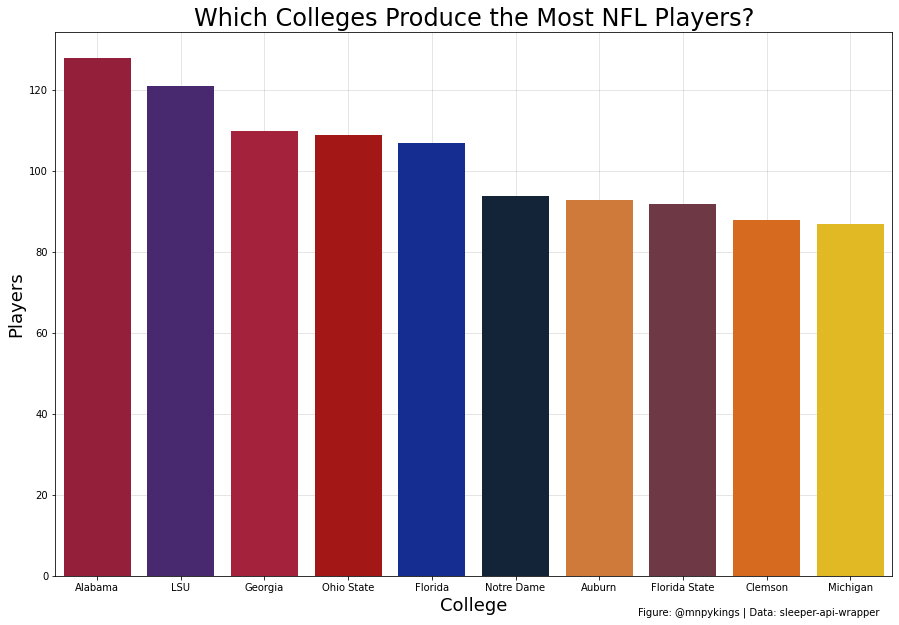

In [ ]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(15,10))

#Generate Barplot
sns.barplot(x=top_viz.college, y=top_viz.full_name,palette=top_viz.color)


#Add grid lines
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Labels/citation
plt.xlabel('College',fontsize=18)
plt.ylabel('Players',fontsize=18)
plt.title('Which Colleges Produce the Most NFL Players?',fontsize=24)
plt.figtext(0.665,0.07,'Figure: @mnpykings | Data: sleeper-api-wrapper')

#Save the figure if you wish
#plt.savefig('_name_.png', dpi=300)

And there we go! The current top 10 colleges in terms of NFL player production according to our data. Let's do one more! How about a scatterplot of WR height and weight?

In [ ]:
#Subsetting by position
viz2 = final_df[final_df.fantasy_positions=='WR']

In [ ]:
#Make sure everything looks good
viz2

,players,display_name,settings.division,player_id,full_name,fantasy_positions,age,height,weight,birth_date,years_exp,inches
1,1426,maxbolger,3,1426,DeAndre Hopkins,WR,28.0,"6'1""",214,1992-06-06,7.0,73
3,2331,maxbolger,3,2331,Breshad Perriman,WR,26.0,"6'2""",215,1993-09-10,5.0,74
5,2410,maxbolger,3,2410,Jamison Crowder,WR,27.0,"5'9""",177,1993-06-17,5.0,69
7,2821,maxbolger,3,2821,Jake Kumerow,WR,28.0,"6'4""",209,1992-02-17,5.0,76
9,3199,maxbolger,3,3199,Michael Thomas,WR,27.0,"6'3""",212,1993-03-03,4.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...
326,3286,emorrell11,4,3286,Demarcus Robinson,WR,25.0,"6'1""",203,1994-09-21,4.0,73
334,5873,emorrell11,4,5873,Riley Ridley,WR,24.0,"6'1""",200,1996-07-21,1.0,73
337,6866,emorrell11,4,6866,K.J. Hill,WR,22.0,"6'0""",198,1997-09-15,0.0,72
338,6895,emorrell11,4,6895,Quintez Cephus,WR,22.0,"6'1""",202,1998-04-01,0.0,73


We are going to label some points on this chart, so we actually need to import one more dependency. The package ```adjustText``` does this and a lot more. However, it's not one of the packages native to colab, so we must ```pip install``` the package.

*Check out the adjustText documentation [here](https://adjusttext.readthedocs.io/en/latest/)*

In [ ]:
pip install adjustText

Now we can import it like our other dependencies.

In [ ]:
from adjustText import adjust_text

Text(0.665, 0.07, 'Figure: @mnpykings | Data: sleeper-api-wrapper')

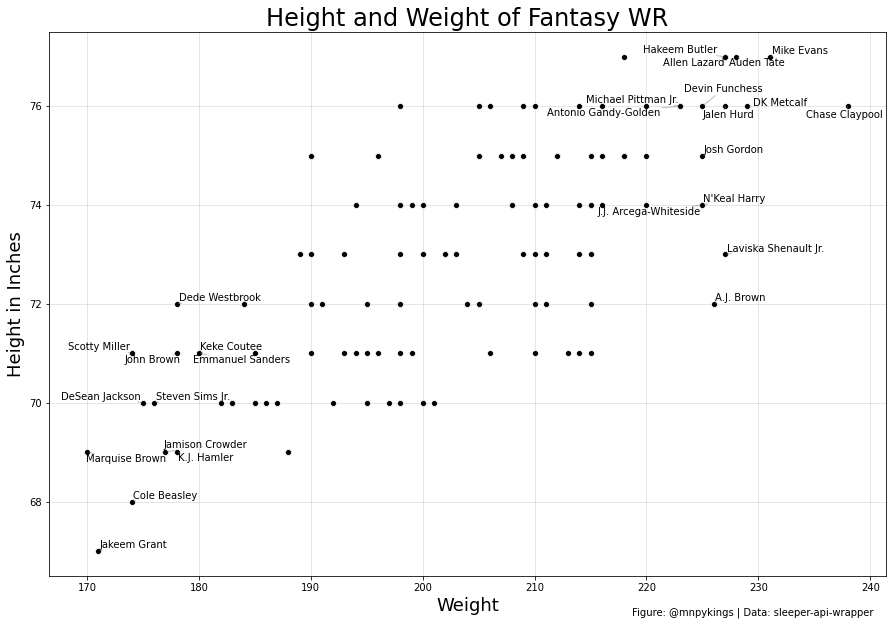

In [ ]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(15,10))

#Generate scatterplot
sns.scatterplot(x=viz2.weight, y=viz2.inches,color='black')

#Subsetting the dataframe to consist of points we want to label
# | == 'or', while & == 'and'
labels = viz2[(viz2.weight<181) | (viz2.weight>220)]

#Label desired points. We aren't labeling every point as it would take
#away from the chart and clutter it

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    labels.weight, labels.inches, labels.full_name)]

adjust_text(texts,arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

#Add grid lines
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Labels/citation
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Height in Inches',fontsize=18)
plt.title('Height and Weight of Fantasy WR',fontsize=24)
plt.figtext(0.665,0.07,'Figure: @mnpykings | Data: sleeper-api-wrapper')

#Save the figure if you wish
#plt.savefig('_name_.png', dpi=300)

That looks good! Note that some of the labels seem to be sharing points. This is simply because some players have the same height and weight. For example, Michael Pittman Jr. and Antonio Gandy-Golden are both 6'4", 223 and Hakeem Butler and Allen Lazard are both 6'5" 227.

What can we take away from this chart? A.J. Brown is an absolute tank! Despite being the same height as Dede Westbrook, he weighs 48 pounds more than him! No wonder he lead the league in yards after catch per reception (YAC/R) with 8.8. Marquise Brown was towards the bottom in YAC/R with only 5.4. A fun project beyond this tutorial would be to run a linear regression using [sci-kit learn](https://scikit-learn.org/stable/index.html) or [statsmodels](https://www.statsmodels.org/stable/index.html) to see how correlated YAC/R and height/weight are! *(Maybe I could make a tutorial about this in the future)*

##Closing Items

**API ethics**

- When using an API, it's important to be courteous of the API and its provider. Making an abundance of calls in a short period of time can bloat the API and perhaps even get your IP-Address banned. Sleeper specifically requests that users only call the `Players.get_all_players()` endpoint once per day due to the size of the query. It is advised that you use `.to_csv()` to save the dataframe on your machine after obtaining the data to limit calls to this endpoint.

**Check out the [documentation](https://pypi.org/project/sleeper-api-wrapper/)**

- This tutorial called only some of the endpoints Sleeper's API has to offer. Once the season starts, you can get all sorts of data such as matchups, close games, the league scoreboard and playoff bracket, and more! As we enter the season, I may update this tutorial leveraging some of these endpoints.

**Have fun!**

- Sports analytics is growing faster than ever and there are great communities within each sport. If you wish to continue learning more python, there are so many open source projects and tutorials to aid in the learning process. Starting a Twitter page and sharing your analysis is an awesome way to learn new things and have fun while doing so.

##That concludes this tutorial! If you made it this far, I really appreciate you taking the time to do so and I hope you learned some python in the process. Feel free to reach out with any questions or comments on Twitter. You can find me [@mnpykings](https://twitter.com/mnpykings).